In [2]:
import PyPlot as plt
plt.pygui(true)
using LaTeXStrings

using DelimitedFiles

dir_path = joinpath("..",  "code_benchmarking")
println(dir_path)

..\code_benchmarking


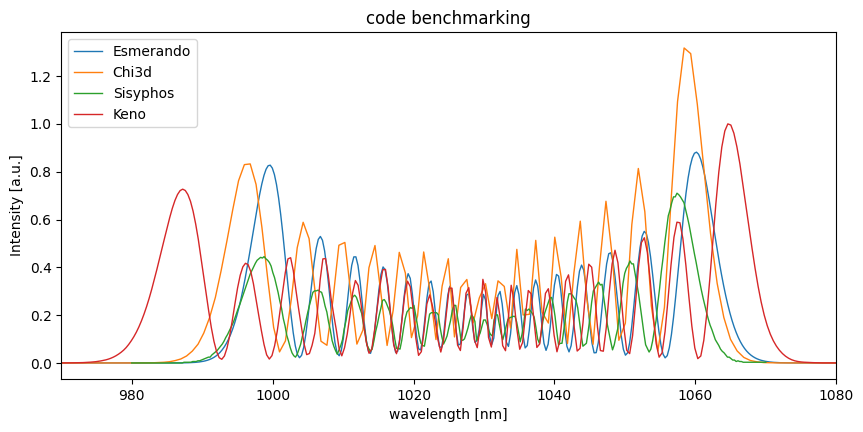

In [3]:
# KAUMANNS EXPERIMENT
file_wl ="kaumanns_wl.csv"
file_int ="kaumanns_int.csv"

wl_kau = readdlm(joinpath(dir_path, file_wl))
int_kau = readdlm(joinpath(dir_path, file_int))


# ESMERANDOS SIMULATION
file_wl ="esmerando_wl.csv"
file_int ="esmerando_int.csv"

wl_esm = readdlm(joinpath(dir_path, file_wl))
int_esm = readdlm(joinpath(dir_path, file_int))


# CHI3D SIMULATION
file_wl ="chi3d_wl.csv"
file_int ="chi3d_int.csv"

wl_chi = readdlm(joinpath(dir_path, file_wl))
int_chi = readdlm(joinpath(dir_path, file_int))


# SISYFOS SIMULATION
file_wl ="sisyfos_wl.csv"
file_int ="sisyfos_int.csv"

wl_sis = readdlm(joinpath(dir_path, file_wl))
int_sis = readdlm(joinpath(dir_path, file_int))

# KENO LUNA SIMULATION

file_wl = joinpath("run_2025_03_13__15_24_51", "output_spectrum.txt")
file_int = joinpath("run_2025_03_13__15_24_51", "time_domain_output")

data_keno = readdlm(joinpath(dir_path, file_wl), skipstart=1)
wl_keno = data_keno[:, 1]
int_keno = data_keno[:, 2]
int_keno ./= maximum(int_keno)

plt.figure(figsize=[10, 4.5])
plt.title("code benchmarking")
# plt.plot(wl_kau, int_kau, label="Kaumanns", linewidth=1.0)
plt.plot(wl_esm, int_esm, label="Esmerando", linewidth=1.0)
plt.plot(wl_chi, int_chi, label="Chi3d", linewidth=1.0)
plt.plot(wl_sis, int_sis, label="Sisyphos", linewidth=1.0)
plt.plot(wl_keno, int_keno, label="Keno", linewidth=1.0)
plt.xlabel("wavelength [nm]")
plt.ylabel("Intensity [a.u.]")
plt.xlim(970, 1080)
plt.legend()
#plt.show()
plt.gcf()

In [15]:
println(size(dropdims( wl_kau,dims=2)))
println(size(int_kau))

(394,)
(394, 1)


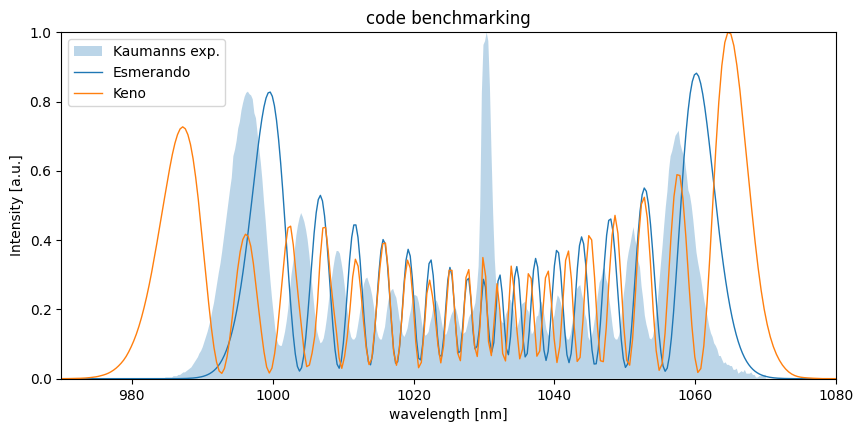

In [23]:
plt.figure(figsize=[10, 4.5])
plt.title("code benchmarking")
plt.fill_between(dropdims(wl_kau,dims=2), dropdims(int_kau, dims=2), alpha=0.3, label="Kaumanns exp.") 
#plt.plot(wl_kau, int_kau, label="Kaumanns", linewidth=1.0)
plt.plot(wl_esm, int_esm, label="Esmerando", linewidth=1.0)
# plt.plot(wl_chi, int_chi, label="Chi3d", linewidth=1.0)
# plt.plot(wl_sis, int_sis, label="Sisyphos", linewidth=1.0)
plt.plot(wl_keno, int_keno, label="Keno", linewidth=1.0)
plt.xlabel("wavelength [nm]")
plt.ylabel("Intensity [a.u.]")
plt.xlim(970, 1080)
plt.ylim(0,1)
plt.legend()
#plt.show()
plt.gcf()

## Comparison: trying to reproduce Esmerandos Results for the Kaumanns simulation

In [5]:
## My attempt to reproduce his results for Kaumanns experiment using his script
dir_path = joinpath("..",  "code_benchmarking", "2025-03-17_14-21-44")

#spectrum
file = joinpath(dir_path, "spectrum.txt")
data = readdlm(file, '\t', skipstart=1)
wl_esm_keno = data[:,1]   
int_esm_keno = data[:,2]
int_esm_keno ./= maximum(int_esm_keno)
# ϕω1 = data[:,3]

# # pulse temporal
# file = joinpath(dir_path, "pulse.txt")
# data = readdlm(file, '\t', skipstart=1) 
# t1 = data[:,1].*1e15 
# It1 = data[:,2] 
# ϕt1 = data[:,3]

8192-element Vector{Float64}:
 7.141548172043696e-22
 7.401418582119758e-22
 7.636024464828464e-22
 7.9074851756752935e-22
 8.136941890037856e-22
 8.400909976073871e-22
 8.636863214668123e-22
 8.854351427569174e-22
 9.07214729230625e-22
 9.27852919420713e-22
 ⋮
 6.973228739198421e-22
 7.314453290947936e-22
 7.6905376583495115e-22
 8.0730762784809035e-22
 8.435347428728201e-22
 8.838655728773773e-22
 9.157160306310406e-22
 9.557241906407101e-22
 9.970559515374232e-22

In [6]:
## My attempt to reproduce his results for Kaumanns experiment using his script but with n2 and Sellmeier from luna
dir_path = joinpath("..",  "code_benchmarking", "2025-03-17_14-43-43")

#spectrum
file = joinpath(dir_path, "spectrum.txt")
data = readdlm(file, '\t', skipstart=1)
wl_esm_keno_luna = data[:,1]   
int_esm_keno_luna = data[:,2]
int_esm_keno_luna ./= maximum(int_esm_keno_luna)
# ϕω1 = data[:,3]

# # pulse temporal
# file = joinpath(dir_path, "pulse.txt")
# data = readdlm(file, '\t', skipstart=1) 
# t1 = data[:,1].*1e15 
# It1 = data[:,2] 
# ϕt1 = data[:,3]

8192-element Vector{Float64}:
 1.7467209571055387e-20
 1.7266263278531843e-20
 1.7048105127431337e-20
 1.6796886402238524e-20
 1.6546352580081732e-20
 1.6251821564040326e-20
 1.595411997056892e-20
 1.563827488711119e-20
 1.530625667457424e-20
 1.494897507426122e-20
 ⋮
 2.6255167358672026e-20
 2.6310156340162364e-20
 2.6332065665317107e-20
 2.6301584909621838e-20
 2.6235688045385803e-20
 2.6130040134706832e-20
 2.601461410082283e-20
 2.584211247838525e-20
 2.5619383513247796e-20

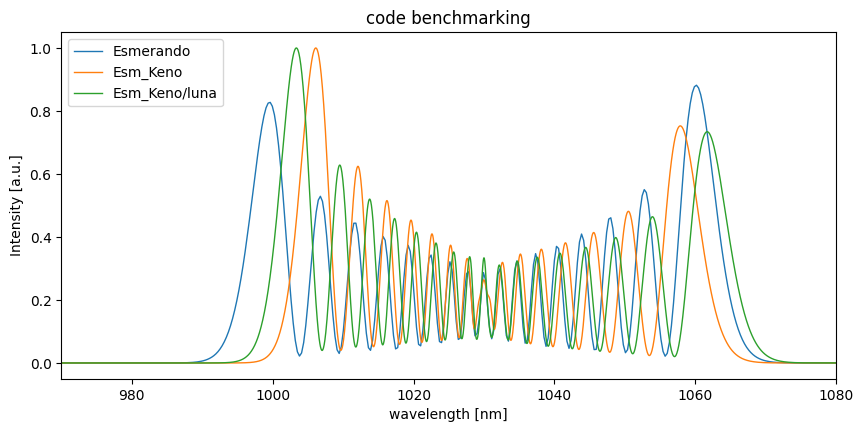

In [7]:
plt.figure(figsize=[10, 4.5])
plt.title("code benchmarking")
# plt.plot(wl_kau, int_kau, label="Kaumanns", linewidth=1.0)
plt.plot(wl_esm, int_esm, label="Esmerando", linewidth=1.0)
# plt.plot(wl_chi, int_chi, label="Chi3d", linewidth=1.0)
# plt.plot(wl_sis, int_sis, label="Sisyphos", linewidth=1.0)
# plt.plot(wl_keno, int_keno, label="Keno", linewidth=1.0)
plt.plot(wl_esm_keno, int_esm_keno, label="Esm_Keno", linewidth=1.0)
plt.plot(wl_esm_keno_luna, int_esm_keno_luna, label="Esm_Keno/luna", linewidth=1.0)

plt.xlabel("wavelength [nm]")
plt.ylabel("Intensity [a.u.]")
plt.xlim(970, 1080)
plt.legend()
#plt.show()
plt.gcf()